In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import Distance
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
%matplotlib inline

specObjID=[]
z=[]
ra=[]
dec=[]
cx=[]
cy=[]
cz=[]
with open('./data/Skyserver_SQL_1_xyz.csv','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split(',')
            specObjID.append(float(tmp[0]))
            z.append(float(tmp[1]))
            ra.append(float(tmp[2]))
            dec.append(float(tmp[3]))
            cx.append(float(tmp[4]))
            cy.append(float(tmp[5]))
            cz.append(float(tmp[6]))

with open('./data/Skyserver_SQL_2_xyz.csv','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split(',')
            specObjID.append(float(tmp[0]))
            z.append(float(tmp[1]))
            ra.append(float(tmp[2]))
            dec.append(float(tmp[3]))
            cx.append(float(tmp[4]))
            cy.append(float(tmp[5]))
            cz.append(float(tmp[6]))
            
specObjID = np.array(specObjID,'d')
z = np.array(z,'d')
ra = np.array(ra,'d')
dec = np.array(dec,'d')
cx = np.array(cx)
cy = np.array(cy)
cz = np.array(cz)

c = SkyCoord(ra=ra[0]*u.degree, dec=dec[0]*u.degree, distance=z[0]*300000/70*u.Mpc)
print(c.cartesian.x,c.cartesian.y,c.cartesian.z)
print(cx[0],cy[0],cz[0])
normnum = np.sqrt(cx[0]**2+cy[0]**2+cz[0]**2)
## The result is that these are consistent

#coord_array = SkyCoord(ra=ra*u.degree,dec=dec*u.degree, distance=z*300000/70*u.Mpc)

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
#coord_100 = coord_array[coord_array.distance.value<100.]
#ax.scatter(coord_100.cartesian.x,coord_100.cartesian.y,coord_100.cartesian.z)#,c = (256. - RVel_val/max(RVel_val)*256.) )

"""
>>> from astropy.coordinates import Distance
>>> c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)
>>> c.cartesian.x  
<Quantity 568.7128654235232 kpc>
>>> c.cartesian.y  
<Quantity 107.3008974042025 kpc>
>>> c.cartesian.z  
<Quantity 507.88994291875713 kpc
"""

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(<Quantity -149.9256932839889 Mpc>, <Quantity 4.310625480836483 Mpc>, <Quantity 208.0163064916479 Mpc>)
(-0.58461747094914696, 0.016808773143653699, 0.81113493193575903)


'\n>>> from astropy.coordinates import Distance\n>>> c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)\n>>> c.cartesian.x  \n<Quantity 568.7128654235232 kpc>\n>>> c.cartesian.y  \n<Quantity 107.3008974042025 kpc>\n>>> c.cartesian.z  \n<Quantity 507.88994291875713 kpc\n'

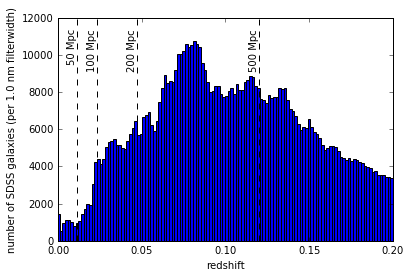

In [19]:
filterwidth = 1. #nm
z_filterwidth = filterwidth/660. # 1nm
numbins = 0.2/z_filterwidth
plt.hist(z,bins=round(numbins))
plt.xlabel('redshift')
plt.ylabel(r'number of SDSS galaxies (per %s nm filterwidth)'%(filterwidth))
#plt.show()
plt.ylim(0,12000)
plt.xlim(0,0.2)
z_50 = 0.0115
z_100 = 0.0235
z_200 = 0.047
z_500 = 0.12
plt.plot([z_50,z_50],[0,12000],'k--')
plt.plot([z_100,z_100],[0,12000],'k--')
plt.plot([z_200,z_200],[0,12000],'k--')
plt.plot([z_500,z_500],[0,12000],'k--')
plt.text(z_50-0.006,11000,'50 Mpc',rotation=90)
plt.text(z_100-0.006,11000,'100 Mpc',rotation=90)
plt.text(z_200-0.006,11000,'200 Mpc',rotation=90)
plt.text(z_500-0.006,11000,'500 Mpc',rotation=90)
#plt.savefig('SDSS_galaxies.pdf')


In [4]:
coho = True
chinook=False
if chinook:
    homedir = 'Users/lokhorst'
elif coho:
    homedir = '/Users/deblokhorst'
    
# UVES Sky background files (continuum and emission lines)
filename1 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_580U.fits'
filename2 = homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/fluxed_sky_860L.fits'
hdulist1 = fits.open(filename1)
hdulist2 = fits.open(filename2)
flux1 = hdulist1[0].data
flux2 = hdulist2[0].data
CRPIX1 = hdulist1[0].header['CRPIX1']
CRVAL1 = hdulist1[0].header['CRVAL1']
CDELT1 = hdulist1[0].header['CDELT1']
print(CRPIX1,CRVAL1,CDELT1)
hdulist1.close()
begin = CRVAL1 - CRPIX1*CDELT1   
end = begin + len(flux1)*CDELT1
wavelength1 = np.arange(begin,end,CDELT1)
print(len(wavelength1),len(flux1))

CRPIX1 = hdulist2[0].header['CRPIX1']
CRVAL1 = hdulist2[0].header['CRVAL1']
CDELT1 = hdulist2[0].header['CDELT1']
print(CRPIX1,CRVAL1,CDELT1)
hdulist2.close()
begin = CRVAL1 - CRPIX1*CDELT1   
end = begin + len(flux2)*CDELT1
wavelength2 = np.arange(begin,end,CDELT1)
print(len(wavelength2),len(flux2))

# UVES identified line lists
line_wavelength = []
with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_580U.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength.append(tmp[1])
with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_ident/gident_860L.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength.append(tmp[1])
line_wavelength = np.array(line_wavelength,'d')
# Keck identified line lists
line_wavelength_KECK = []
with open(homedir+'/Dropbox/UVES_Sky_Background/UVES_sky_all/KECK_HIRES_skyatlas_OH.dat','r') as f:
    for line in f:
        if line[0]!='#' and len(line)>5:
            tmp = line.split()
            line_wavelength_KECK.append(tmp[0])
line_wavelength_KECK = np.array(line_wavelength_KECK,'d')

(-945.0, 5817.06402, 0.03482)
(27284, 27284)
(-2318.0, 6605.74752, 0.04064)
(45278, 45277)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 45277 but corresponding boolean dimension is 45278
  app.launch_new_instance()


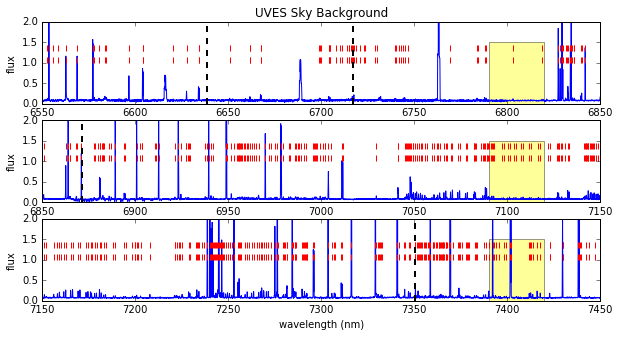

In [7]:
z_50 = 0.0115
z_100 = 0.0235
z_200 = 0.047
z_500 = 0.12
lambda_50 = 6563.*(z_50+1.)
lambda_100 = 6563.*(z_100+1.)
lambda_200 = 6563.*(z_200+1.)
lambda_500 = 6563.*(z_500+1.)

#f = plt.figure(figsize=(15.,10.))
f, (ax1, ax2,ax3) = plt.subplots(3, sharey=True, figsize=(10.,5.))
ax1.set_title('UVES Sky Background')

for lowlim,ax in zip([6550.,6850.,7150.],[ax1,ax2,ax3]):
    ax.plot(wavelength1[(wavelength1>lowlim) & (wavelength1<(lowlim+300.))],flux1[(wavelength1>lowlim) & (wavelength1<(lowlim+300.))],'b')
    ax.plot(wavelength2[(wavelength2>lowlim) & (wavelength2<(lowlim+300.))],flux2[(wavelength2>lowlim) & (wavelength2<(lowlim+300.))],'b')
    ax.set_ylim(0,2)
    ax.set_xlim(lowlim,(lowlim+300.))
    ax.set_ylabel('flux')
    for line in line_wavelength:
        ax.plot([line,line],[1.0,1.5],'r--')
        
    for wavelen,name in zip([lambda_50,lambda_100,lambda_200,lambda_500],['50 Mpc','100 Mpc','200 Mpc','500 Mpc']):
        ax.plot([wavelen,wavelen],[0.,3.],'k--',linewidth=2)
       # if (wavelen>lowlim) and (wavelen<(lowlim+300.)):
       #     plt.text(line,1.5,name,rotation=90)
        
    ax.fill_between([lowlim+240.,lowlim+240.+30.], 0, 1.5,facecolor ='yellow',alpha=0.4)
    #ax.plot([lowlim+240.,lowlim+240.,lowlim+240.+30.,lowlim+240.+30.,lowlim+240.],[0,1.5,1.5,0,0],'g-',linewidth=2)

ax.set_xlabel('wavelength (nm)')
plt.savefig('UVES_skybackground_condensed.pdf')

In [5]:
def plotSDSShist(ax,start=6550.,end=7450.):
    filterwidth = 3. #nm
    z_filterwidth = filterwidth/660. # 1nm
    numbins = 0.2/z_filterwidth
    #plt.hist(z,bins=round(numbins))

    ### First try
    wavelength = 6563.*(1.+z)
    ax.hist(wavelength,bins=round(numbins))
    
    ax.set_xlim(start,end)
    ax.set_ylabel('# of SDSS galaxies')
    # locations off 50Mpc, 100Mpc, 200Mpc, 500Mpc away
    for wavelen,name in zip([lambda_50,lambda_100,lambda_200,lambda_500],['50 Mpc','100 Mpc','200 Mpc','500 Mpc']):
        ax.plot([wavelen,wavelen],[0.,35000.],'k--',linewidth=2)
        plt.text(wavelen,25000,name,rotation=90)

    
    ### Second try
  #  nx, xbins, ptchs = plt.hist(wavelength, bins=round(numbins))
  #  plt.clf() # Get rid of this histogram since not the one we want.

  #  nx_frac = nx/float(len(nx)) # Each bin divided by total number of objects.
  #  width = xbins[1] - xbins[0] # Width of each bin.
  #  x = np.ravel(zip(xbins[:-1], xbins[:-1]+width))
  #  y = np.ravel(zip(nx_frac,nx_frac))

  #  plt.plot(x,y/max(y),'k-')
    
    ### Third try
  #  hist, bins = np.histogram(wavelength, bins = round(numbins))
  #  max_val = max(hist)
    #hist_frac = hist/max_val
  #  hist_frac = [ float(n)/max_val for n in hist]

    # Plot the resulting histogram
    #center = (bins[:-1]+bins[1:])/2
    #width = 0.7*(bins[1]-bins[0])
    
    #plt.bar(center, hist, align = 'center', width = width)
    
  #  width = bins[1] - bins[0] # Width of each bin
  #  x = np.ravel(zip(bins[:-1], bins[:-1]+width))
  #  y = np.ravel(zip(hist_frac,hist_frac))
  #  plt.plot(x,y,'k-')

In [6]:
def plotskybackground(ax,start=6550.,end=7450.):
    indices1 = (wavelength1>start) & (wavelength1<end)
    if len(wavelength1[indices1])>0:
        newstart = wavelength1[indices1][-1]
        print newstart
    else:
        newstart=start
        print newstart
    indices2 = (wavelength2>newstart) & (wavelength2<end)
    #ax.plot(wavelength1[indices1],flux1[indices1])
    #ax.plot(wavelength2[indices2],flux2[indices2])
    ax.plot(np.concatenate([wavelength1[indices1],wavelength2[indices2]]),
            np.concatenate([flux1[indices1],flux2[indices2]]))
    ax.set_ylim(0,1)
    ax.set_xlim(start,end)
    ax.set_ylabel('Flux (sky)')
    
    # identified lines
    for line in line_wavelength:
        ax.plot([line],[1.5],'ro')
    
    # locations off 50Mpc, 100Mpc, 200Mpc, 500Mpc away
    for wavelen,name in zip([lambda_50,lambda_100,lambda_200,lambda_500],['50 Mpc','100 Mpc','200 Mpc','500 Mpc']):
        ax.plot([wavelen,wavelen],[0.,3.],'k--',linewidth=2)
       # if (wavelen>lowlim) and (wavelen<(lowlim+300.)):
       #     plt.text(line,1.5,name,rotation=90)
        
    # pretend filter (3 nm wide)
    #ax.fill_between([lowlim+240.,lowlim+240.+30.], 0, 1.5,facecolor ='yellow',alpha=0.4)
    #ax.plot([lowlim+240.,lowlim+240.,lowlim+240.+30.,lowlim+240.+30.,lowlim+240.],[0,1.5,1.5,0,0],'g-',linewidth=2)

    ax.set_xlabel('wavelength (nm)')
    
#plt.savefig('UVES_skybackground_condensed.pdf')

In [8]:
import matplotlib
import matplotlib.gridspec as gridspec
z_50 = 0.0115
z_100 = 0.0235
z_200 = 0.047
z_500 = 0.12
lambda_50 = 6563.*(z_50+1.)
lambda_100 = 6563.*(z_100+1.)
lambda_200 = 6563.*(z_200+1.)
lambda_500 = 6563.*(z_500+1.)

In [ ]:
plt.style.use('seaborn-dark-palette')
plt.style.use('ggplot')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

f = plt.figure(figsize=(3.,3.))
f, (ax1, ax2) = plt.subplots(2, figsize=(10.,5.))
#ax1.set_title('UVES Sky Background')
plotSDSShist(ax1,start=6550.,end=7000.)
plt.setp(ax1.get_xticklabels(), visible=False)
plotskybackground(ax2,start=6550.,end=7000.)
f.subplots_adjust(hspace=0.1)
#plt.tight_layout()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 45277 but corresponding boolean dimension is 45278
  del sys.path[0]


6799.96298


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


7000.0


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 45277 but corresponding boolean dimension is 45278
  del sys.path[0]


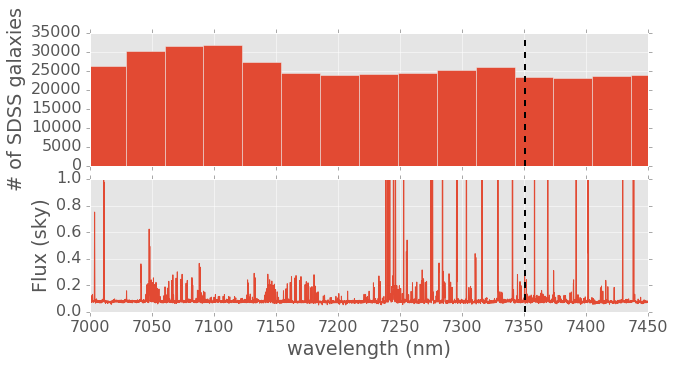

In [149]:
f = plt.figure(figsize=(3.,3.))
f, (ax1, ax2) = plt.subplots(2, figsize=(10.,5.))
#ax1.set_title('UVES Sky Background')
plotSDSShist(ax1,start=7000.,end=7450.)
plt.setp(ax1.get_xticklabels(), visible=False)
plotskybackground(ax2,start=7000.,end=7450.)
f.subplots_adjust(hspace=0.1)


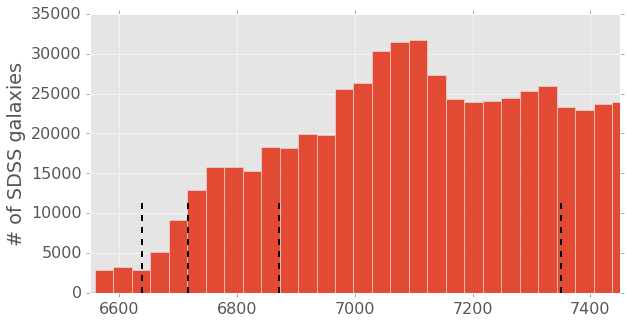

In [146]:
fig = plt.figure(figsize = (9.5, 5.))
ax1 = plt.subplot(111)

plotSDSShist(ax1,start=6550.,end=7450.)

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 1)
